Amanda Michelle Darwis - 0706022310051

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install kneed
from kneed import KneeLocator
import seaborn as sns

# Data Preparation

In [113]:
# load dataset
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/customer_classification_data.csv"
df = pd.read_csv(url)
df.head()

,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
0,66161.01279,57,Bachelor,503,1,41,1968.919899,2517.159284,5813.342700,0.975409,1,0.202693
1,78639.20248,60,High School,779,2,27,9797.056371,31501.758840,3991.007637,0.945920,2,0.549358
2,70207.25321,46,High School,519,14,95,7024.173403,16444.341580,6036.140567,0.272664,3,0.842993
3,65866.23872,42,High School,834,17,77,7992.359261,45233.592940,2691.192862,0.814385,4,0.119473
4,56774.10995,36,Bachelor,410,12,58,538.691042,48586.582480,10144.073090,0.346523,4,0.990168


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Income                 500 non-null    float64
 1   Age                    500 non-null    int64  
 2   Education              500 non-null    object 
 3   Credit_Score           500 non-null    int64  
 4   Years_with_Bank        500 non-null    int64  
 5   Transaction_Count      500 non-null    int64  
 6   Balance                500 non-null    float64
 7   Loan_Approval_Amount   500 non-null    float64
 8   Credit_Card_Limit      500 non-null    float64
 9   Purchase_Frequency     500 non-null    float64
 10  Customer_Satisfaction  500 non-null    int64  
 11  Online_Activity        500 non-null    float64
dtypes: float64(6), int64(5), object(1)
memory usage: 47.0+ KB


There isn't any null value, so we don't have to handle any missing value.

In [115]:
df.describe()

,Income,Age,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,62244.823110,40.010000,564.992000,10.806000,48.486000,5062.825191,25395.518396,10609.972452,0.512753,2.564000,0.494516
std,21881.731581,13.051229,159.206663,5.151061,28.742339,2926.414765,14257.083307,5572.250431,0.282915,1.101058,0.294468
min,25352.160710,18.000000,300.000000,1.000000,1.000000,44.900440,1087.318821,1017.345471,0.000813,1.000000,0.001320
25%,43586.942127,29.000000,426.000000,7.000000,25.000000,2563.861164,13254.375542,5788.708258,0.272196,2.000000,0.239926
50%,61513.145375,39.000000,562.000000,11.000000,48.000000,4962.940262,25523.286385,10716.457885,0.531370,3.000000,0.485326
75%,79805.933200,51.000000,692.000000,15.000000,72.000000,7575.192218,38359.706343,15530.730127,0.763411,4.000000,0.759197
max,99913.525490,64.000000,849.000000,19.000000,99.000000,9984.440444,49971.895230,19968.520560,0.993942,4.000000,0.999897


# Encoding


In [116]:
# Identify categorical column for encoding
categorical_col = 'Education'

# Initialize LabelEncoder
le = LabelEncoder()

# Apply Label Encoding to the 'Education' column
df['Education'] = le.fit_transform(df['Education'])

print("DataFrame head after Label Encoding 'Education':")
print(df.head())

# Display info of the DataFrame to confirm 'Education' is numeric
print("\nDataFrame Info after Label Encoding:")
df.info()

DataFrame head after Label Encoding 'Education':
        Income  Age  Education  Credit_Score  Years_with_Bank  \
0  66161.01279   57          0           503                1   
1  78639.20248   60          1           779                2   
2  70207.25321   46          1           519               14   
3  65866.23872   42          1           834               17   
4  56774.10995   36          0           410               12   

   Transaction_Count      Balance  Loan_Approval_Amount  Credit_Card_Limit  \
0                 41  1968.919899           2517.159284        5813.342700   
1                 27  9797.056371          31501.758840        3991.007637   
2                 95  7024.173403          16444.341580        6036.140567   
3                 77  7992.359261          45233.592940        2691.192862   
4                 58   538.691042          48586.582480       10144.073090   

   Purchase_Frequency  Customer_Satisfaction  Online_Activity  
0            0.975409      

# Exploratory Data Analysis

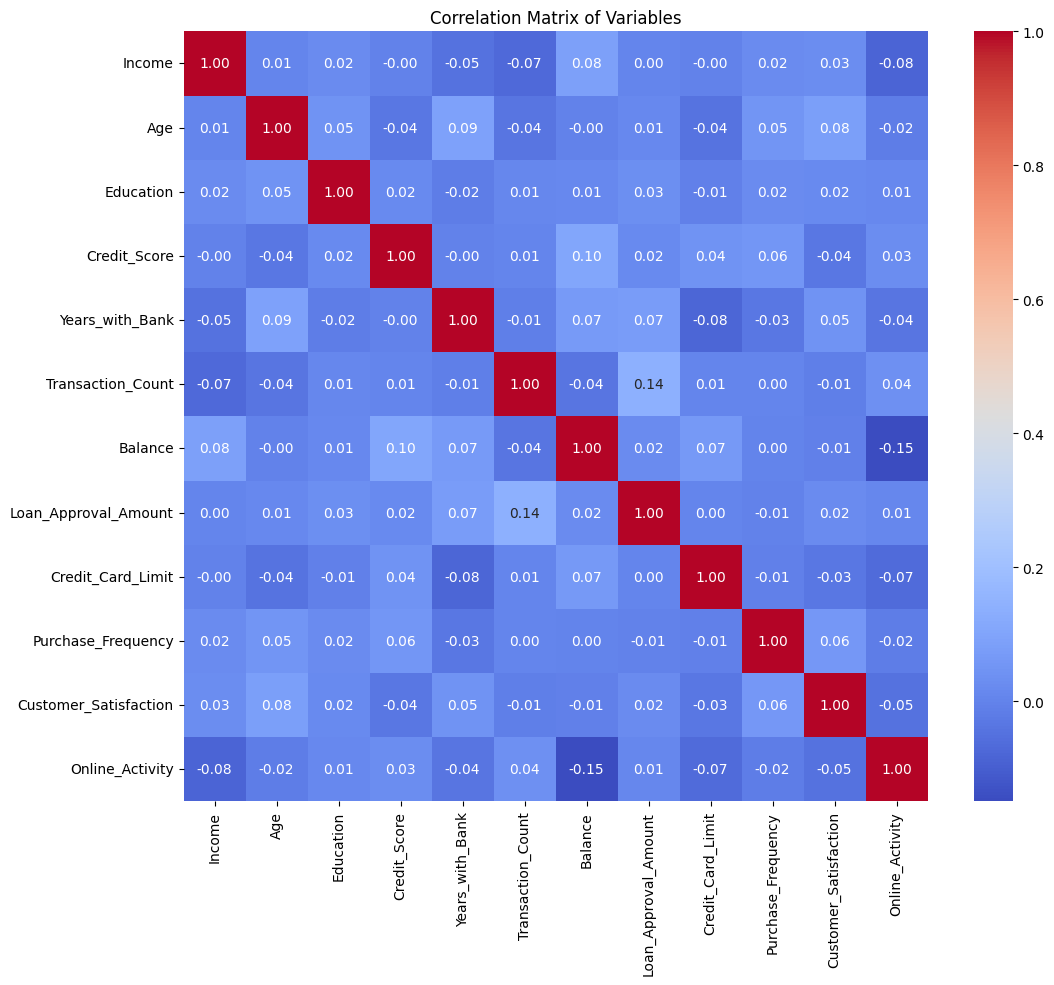

In [117]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Variables')
plt.show()

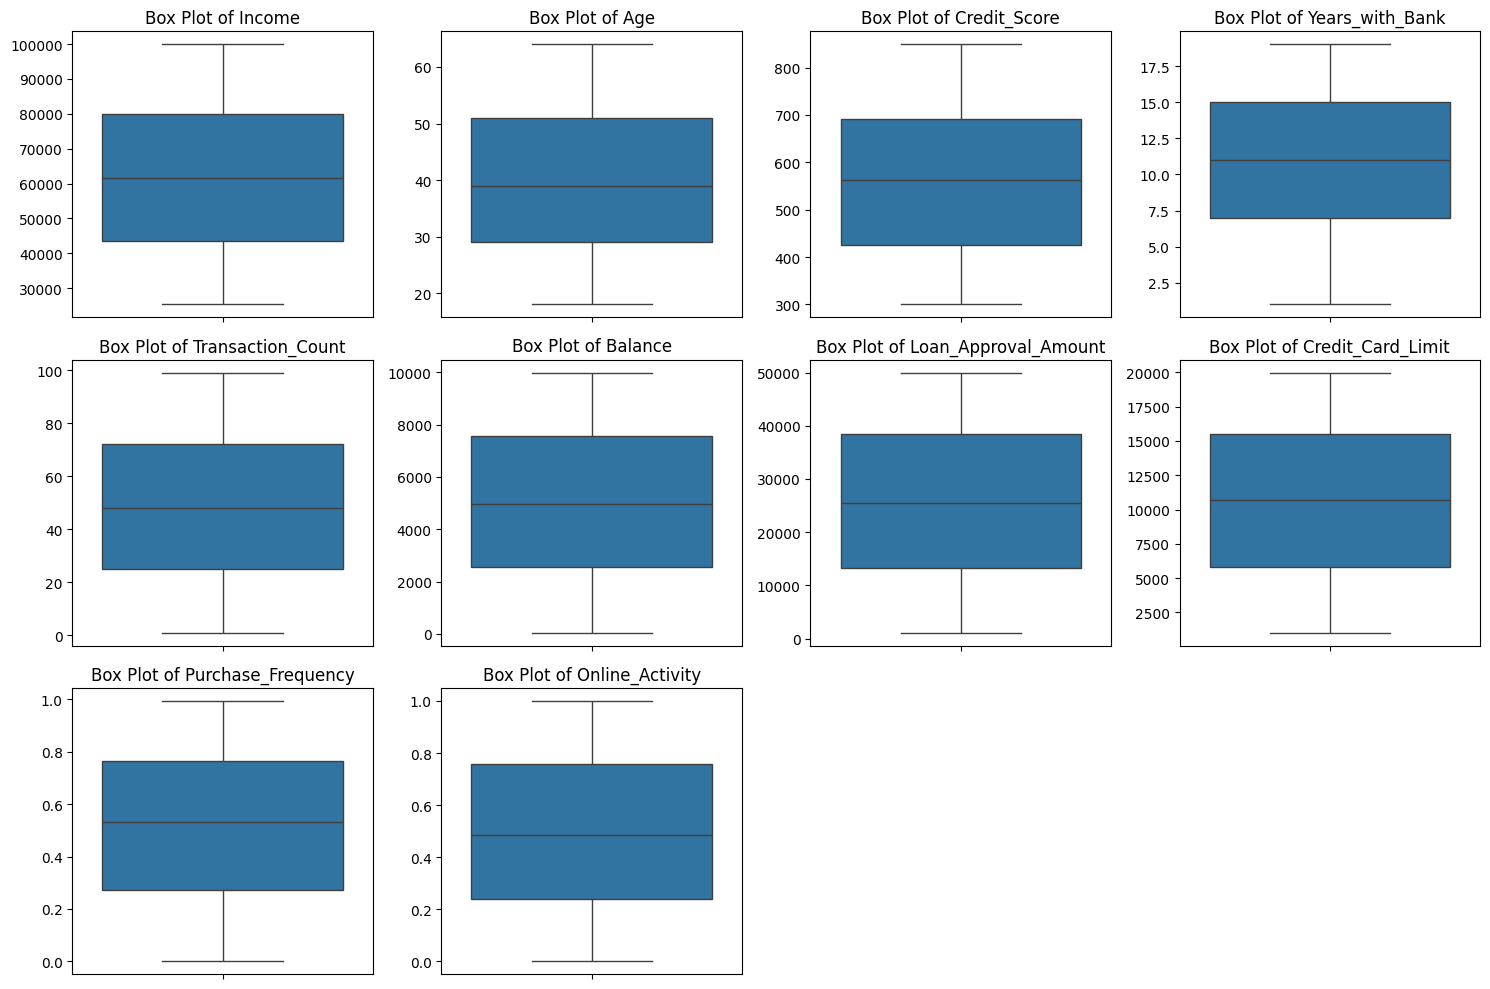

In [118]:
# Box Plot to detect any outliers
numerical_cols = ['Income', 'Age', 'Credit_Score', 'Years_with_Bank', 'Transaction_Count', 'Balance', 'Loan_Approval_Amount', 'Credit_Card_Limit', 'Purchase_Frequency', 'Online_Activity']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 4, i + 1) # Adjust subplot grid as needed
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel('')
plt.tight_layout()
plt.show()

From the box plot above, we can see that :
- Income: Shows a relatively even distribution with a few potential outliers on the higher end.
- Credit_Score: Appears to have a fairly symmetric distribution without significant outliers.
- Loan_Approval_Amount: Has a few outliers on both the lower and higher ends, indicating some unusually low or high loan approval amounts.
Credit_Card_Limit: Also shows some outliers, particularly on the higher end, suggesting some customers have exceptionally high credit limits.-

Value counts for Customer_Satisfaction:
Customer_Satisfaction
1    109
2    132
3    127
4    132
Name: count, dtype: int64


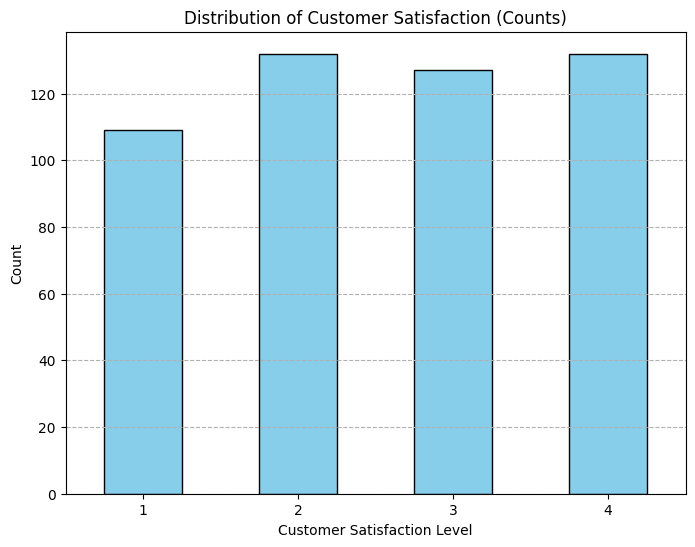

In [119]:
# Bar Plot to show Distribution of Customer Satisfaction
customer_satisfaction_counts = df['Customer_Satisfaction'].value_counts().sort_index()
print("Value counts for Customer_Satisfaction:")
print(customer_satisfaction_counts)

plt.figure(figsize=(8, 6))
customer_satisfaction_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Customer Satisfaction (Counts)')
plt.xlabel('Customer Satisfaction Level')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.show()

From the plot, we can observe the frequency of customers for satisfaction levels 1, 2, 3, and 4 (assuming 1 is the lowest and 4 is the highest satisfaction). The fact that both Customer Satisfaction Level 2 and Level 4 are tied for the highest number of customers (132 each) tells us a few interesting things:

- Bimodal Satisfaction: This indicates a bimodal distribution, meaning customer satisfaction is not concentrated at one extreme (e.g., all highly satisfied) or a smooth curve. Instead, there are two distinct peaks in satisfaction.
- Mixed Sentiment: This dataset have a significant portion of customers who are highly satisfied (Level 4), which is positive. However, this dataset also have an equally large group who are at Level 2, which suggests they are less satisfied, potentially neutral or slightly dissatisfied. This is a crucial segment to investigate.
- Potential for Improvement: The large number of customers at Level 2 highlights an area where focused effort could significantly improve overall customer satisfaction. Understanding why these customers are at Level 2 (and not Level 3 or 4) could lead to actionable insights.
- Targeted Strategies: This distribution suggests that a 'one-size-fits-all' approach to improving satisfaction might not be effective. They might need different strategies to maintain the satisfaction of Level 4 customers versus improving the experience for Level 2 customers.

In essence, it means they have a strong base of happy customers, but also a considerable group that could be at risk or has unmet needs, indicating a clear opportunity for targeted interventions.

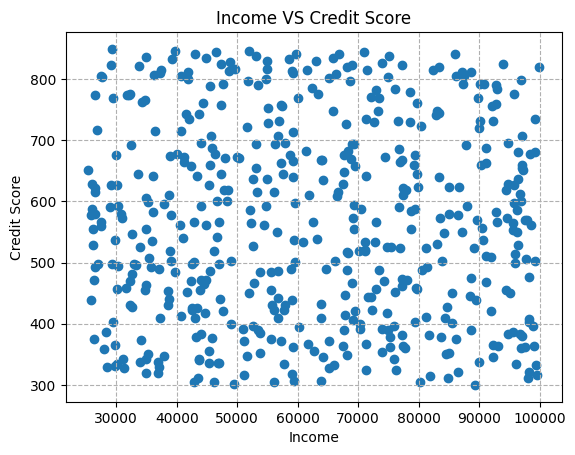

In [120]:
# Scatter Plot to see the distribution of Incone vs Credit Score
plt.scatter(df['Income'], df['Credit_Score'])
plt.title('Income VS Credit Score')
plt.xlabel('Income')
plt.ylabel('Credit Score')
plt.grid(axis='both', linestyle='--')
plt.show()

The scatter plot above generally shows a widespread distribution of points, which suggests that there isn't one simple, strong linear relationship between income and credit score for all customers. Customers exist across a range of incomes and credit scores.
- Highly Satisfied Customers (e.g., Level 4 - often darker shades): We can see that these customers are relatively spread across different income and credit score levels, but they might be slightly more concentrated in higher income and credit score brackets. If there's a denser cluster of Level 4 customers in the upper-right quadrant (high income, high credit score), it suggests that financial stability and good credit are associated with higher satisfaction for a segment of your customers.
- Less Satisfied Customers (e.g., Level 1 or 2 - often lighter shades): Conversely, we can see these customers more frequently in lower income or lower credit score areas, it could imply that financial strain or perceived credit risk might contribute to dissatisfaction. However, if they are also broadly distributed, it indicates that financial metrics alone aren't the sole drivers of their satisfaction.

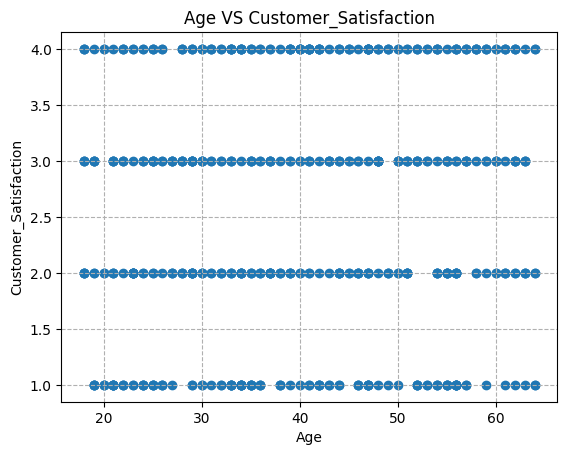

In [121]:
# Scatter Plot to see the distribution of Incone vs Credit Score
plt.scatter(df['Age'], df['Customer_Satisfaction'])
plt.title('Age VS Customer_Satisfaction')
plt.xlabel('Age')
plt.ylabel('Customer_Satisfaction')
plt.grid(axis='both', linestyle='--')
plt.show()

By looking at the spread of points for each satisfaction level across the 'Age' axis: we can see a dense cluster of highly satisfied customers (e.g., Level 4) within a specific age range (e.g., 25-35), it suggests that your product or service particularly resonates with that demographic.
Conversely, if lower satisfaction levels (e.g., Level 1 or 2) are concentrated in another age bracket, it could indicate an area where your offerings are not meeting the expectations of that age group.

It's also very possible that the points are widely scattered across all ages for all satisfaction levels. If there's no visible trend or clustering, it implies that age, by itself, might not be a strong predictor of customer satisfaction in your dataset. In such a scenario, other factors (like income, product usage, or previous interactions) might be more influential in determining satisfaction.

# Data Scaling


In [122]:
# Scale dataset with standard scaler
from sklearn.preprocessing import StandardScaler

# Numerical Columns
num_cols = [
    'Income', 'Age', 'Credit_Score', 'Years_with_Bank', 'Transaction_Count',
    'Balance', 'Loan_Approval_Amount', 'Credit_Card_Limit', 'Purchase_Frequency', 'Online_Activity'
]

# Categorical Columns
cat_cols = ['Education', 'Customer_Satisfaction']

sc = StandardScaler()

df_scaled_num = pd.DataFrame(sc.fit_transform(df[num_cols]), columns=num_cols)
df_sc_scaled = pd.concat([df_scaled_num, df[cat_cols].reset_index(drop=True)], axis=1)
df_sc_scaled.head()

,Income,Age,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Online_Activity,Education,Customer_Satisfaction
0,0.179150,1.303097,-0.389771,-1.905592,-0.260713,-1.058293,-1.606308,-0.861669,1.636958,-0.992013,0,1
1,0.749977,1.533191,1.345561,-1.711263,-0.748287,1.619378,0.428724,-1.189034,1.532620,0.186427,1,2
2,0.364249,0.459420,-0.289172,0.620687,1.619930,0.670893,-0.628469,-0.821645,-0.849476,1.184595,1,3
3,0.165665,0.152629,1.691370,1.203675,0.993049,1.002068,1.392847,-1.422533,1.067226,-1.274907,1,4
4,-0.250263,-0.307558,-0.974502,0.232029,0.331341,-1.547513,1.628264,-0.083694,-0.588149,1.684898,0,4


# K-Means Clustering

In [123]:
from sklearn.cluster import KMeans

## Without Scaling

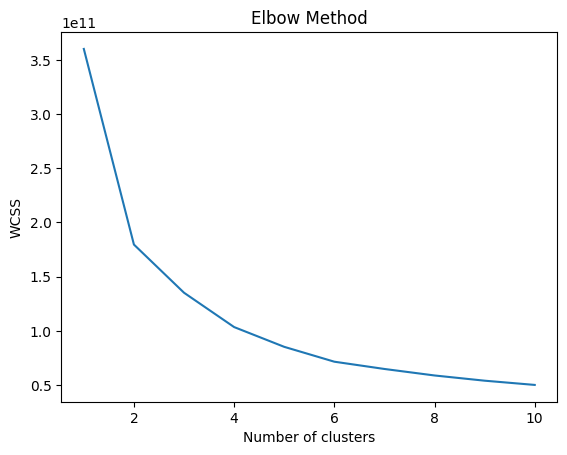

In [124]:
wcss = []
for i in range(1, 11):   #clusters 1-10
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [125]:
# Create a DataFrame to display the WCSS values for each number of clusters
wcss_table = pd.DataFrame({
    "Number of Clusters": range(1, 11),
    "WCSS": wcss
})

# Display the table
print(wcss_table)

   Number of Clusters          WCSS
0                   1  3.601357e+11
1                   2  1.796223e+11
2                   3  1.351798e+11
3                   4  1.034966e+11
4                   5  8.526114e+10
5                   6  7.154790e+10
6                   7  6.483984e+10
7                   8  5.884440e+10
8                   9  5.402805e+10
9                  10  5.012191e+10


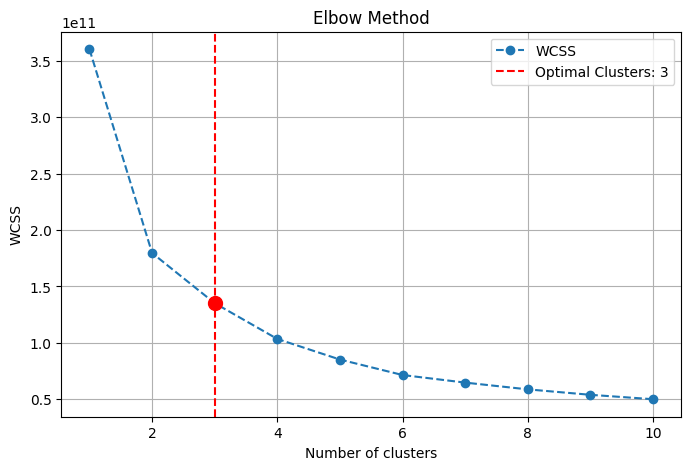

The optimal number of clusters is: 3


In [126]:
# Example WCSS values and cluster numbers
clusters = range(1, 11)

# Automatically find the elbow point using the KneeLocator
knee_locator = KneeLocator(clusters, wcss, curve="convex", direction="decreasing")
optimal_clusters = knee_locator.knee

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(clusters, wcss, marker='o', linestyle='--', label="WCSS")
plt.axvline(optimal_clusters, linestyle='--', color='red', label=f'Optimal Clusters: {optimal_clusters}')
plt.scatter(optimal_clusters, wcss[optimal_clusters-1], c='red', s=100, zorder=5)  # Highlight elbow point
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimal number of clusters
print(f"The optimal number of clusters is: {optimal_clusters}")

In [127]:
# Fit K-Means to the data with the optimal number of K cluster = 5
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, random_state=0)
clusters = kmeans.fit_predict(df)

# Add the cluster labels to the DataFrame
df['KMeans_Cluster'] = clusters

# Show the df
df.head()

,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity,KMeans_Cluster
0,66161.01279,57,0,503,1,41,1968.919899,2517.159284,5813.342700,0.975409,1,0.202693,2
1,78639.20248,60,1,779,2,27,9797.056371,31501.758840,3991.007637,0.945920,2,0.549358,1
2,70207.25321,46,1,519,14,95,7024.173403,16444.341580,6036.140567,0.272664,3,0.842993,2
3,65866.23872,42,1,834,17,77,7992.359261,45233.592940,2691.192862,0.814385,4,0.119473,3
4,56774.10995,36,0,410,12,58,538.691042,48586.582480,10144.073090,0.346523,4,0.990168,3


In [128]:
# Group the data by cluster and calculate the mean spending and annual income for each cluster
cluster_summary = df.groupby(clusters).agg({'Age': ['mean', 'min', 'max'],
                                              'Income': ['mean', 'min', 'max']})

cluster_summary = cluster_summary.rename_axis('KMeans_cluster')

cluster_summary

Age                Income                          
                     mean min max          mean          min          max
KMeans_cluster                                                           
0               39.147368  18  64  36844.392819  25352.16071  48848.73845
1               41.329545  19  64  89555.982874  74730.86523  99580.05922
2               38.574074  18  64  81010.487835  64077.74547  99913.52549
3               40.206186  18  64  62127.776495  48657.12632  75403.58555
4               40.919643  18  63  44336.970875  25878.55631  62939.97879

## With Scaling

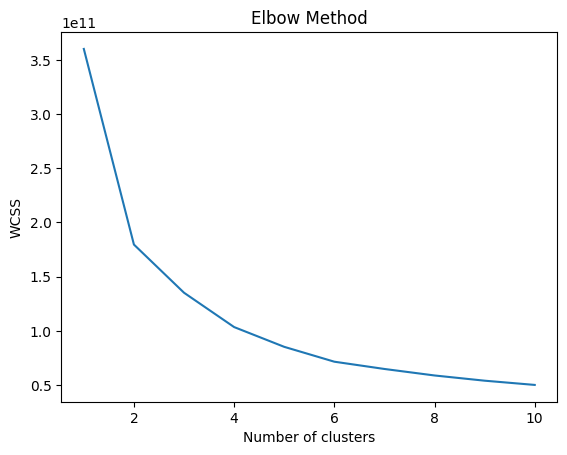

In [129]:
wcss_scaled = []
for i in range(1, 11):   #clusters 1-10
    kmeans_scaled = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans_scaled.fit(df_sc_scaled)
    wcss_scaled.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [130]:
# Create a DataFrame to display the WCSS values for each number of clusters
wcss_table = pd.DataFrame({
    "Number of Clusters": range(1, 11),
    "WCSS_scaled": wcss_scaled
})

# Display the table
print(wcss_table)

   Number of Clusters   WCSS_scaled
0                   1  8.539031e+10
1                   2  8.539031e+10
2                   3  8.539031e+10
3                   4  8.539031e+10
4                   5  8.539031e+10
5                   6  8.539031e+10
6                   7  8.539031e+10
7                   8  8.539031e+10
8                   9  8.539031e+10
9                  10  8.539031e+10


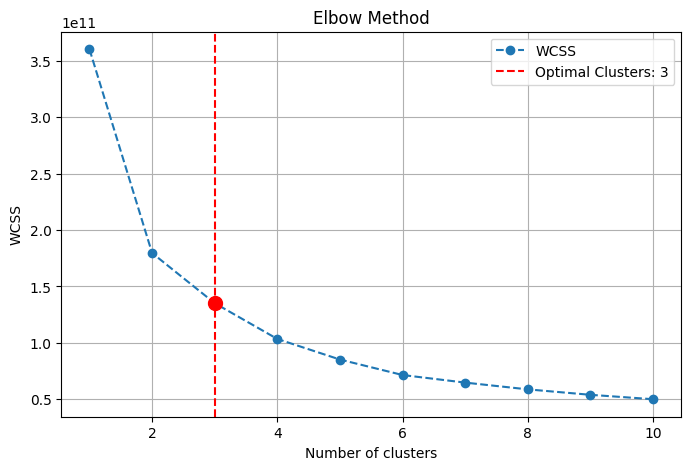

The optimal number of clusters is: 3


In [134]:
# Example WCSS values and cluster numbers
clusters = range(1, 11)

# Automatically find the elbow point using the KneeLocator
knee_locator = KneeLocator(clusters, wcss, curve="convex", direction="decreasing")
optimal_clusters = knee_locator.knee

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(clusters, wcss, marker='o', linestyle='--', label="WCSS")
plt.axvline(optimal_clusters, linestyle='--', color='red', label=f'Optimal Clusters: {optimal_clusters}')
plt.scatter(optimal_clusters, wcss[optimal_clusters-1], c='red', s=100, zorder=5)  # Highlight elbow point
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimal number of clusters
print(f"The optimal number of clusters is: {optimal_clusters}")

In [135]:
# Fit K-Means to the data with the optimal number of K cluster = 5
kmeans_scaled = KMeans(n_clusters=5, init='k-means++', max_iter=300, random_state=0)
clusters_scaled = kmeans_scaled.fit_predict(df_sc_scaled)

# Add the cluster labels to the DataFrame
df['KMeans_Cluster_Scaled'] = clusters_scaled

# Show the df
df.head()

,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity,KMeans_Cluster,KMeans_Cluster_Scaled
0,66161.01279,57,0,503,1,41,1968.919899,2517.159284,5813.342700,0.975409,1,0.202693,2,4
1,78639.20248,60,1,779,2,27,9797.056371,31501.758840,3991.007637,0.945920,2,0.549358,1,2
2,70207.25321,46,1,519,14,95,7024.173403,16444.341580,6036.140567,0.272664,3,0.842993,2,0
3,65866.23872,42,1,834,17,77,7992.359261,45233.592940,2691.192862,0.814385,4,0.119473,3,1
4,56774.10995,36,0,410,12,58,538.691042,48586.582480,10144.073090,0.346523,4,0.990168,3,0


In [136]:
# Group the data by cluster and calculate the mean spending and annual income for each cluster
cluster_summary_scaled = df.groupby(clusters_scaled).agg({'Age': ['mean', 'min', 'max'],
                                              'Income': ['mean', 'min', 'max']})

cluster_summary_scaled = cluster_summary_scaled.rename_axis('KMeans_Cluster_Scaled')

cluster_summary_scaled

Age                Income               \
                            mean min max          mean          min   
KMeans_Cluster_Scaled                                                 
0                      43.460674  18  64  50959.146611  25878.55631   
1                      46.494737  18  64  76333.222074  29897.81554   
2                      40.736264  18  63  64808.676606  26409.23503   
3                      31.970000  18  57  62537.639876  25352.16071   
4                      38.528000  18  63  57472.302805  26232.22222   

                                    
                               max  
KMeans_Cluster_Scaled               
0                      98257.08161  
1                      99128.03785  
2                      99400.84326  
3                      99913.52549  
4                      99580.05922

# Visualizations of the clusters

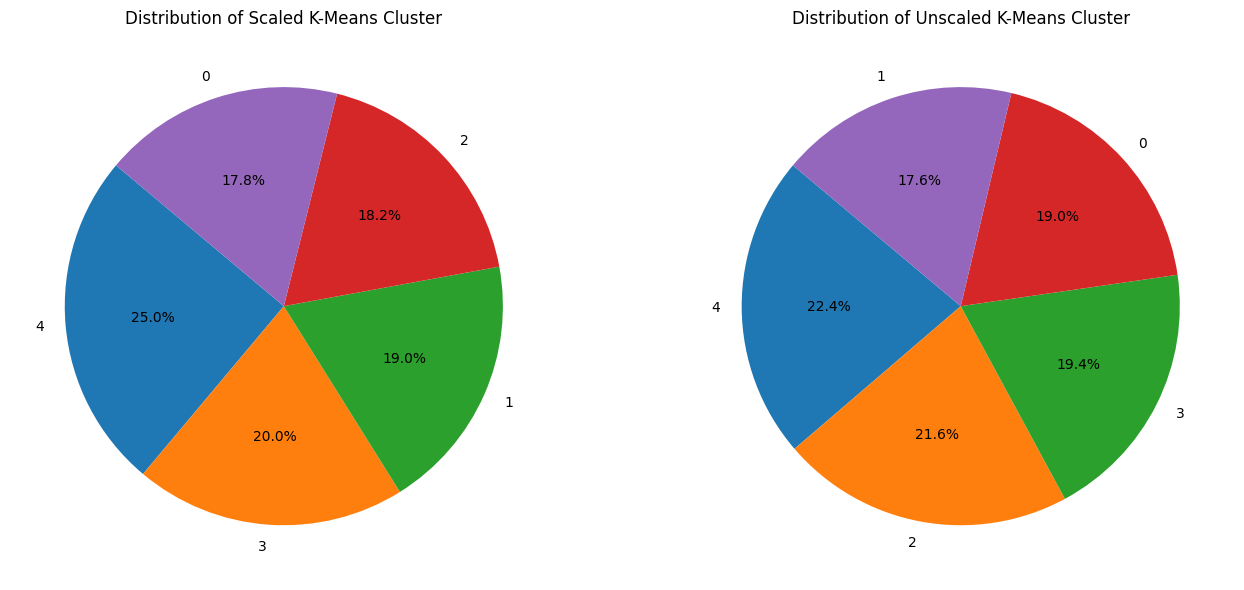

In [137]:
plt.figure(figsize=(14, 6))

# Counts of each unique value in the 'Scaled_K-Means_Cluster' column
plt.subplot(1, 2, 1)
y_counts_scaled = df['KMeans_Cluster_Scaled'].value_counts()
plt.pie(
    y_counts_scaled,
    labels=y_counts_scaled.index,
    autopct='%1.1f%%',
    startangle=140
)
plt.title('Distribution of Scaled K-Means Cluster')

# Counts of each unique value in the 'Unscaled_K-Means_Cluster' column
plt.subplot(1, 2, 2)
y_counts_unscaled = df['KMeans_Cluster'].value_counts()
plt.pie(
    y_counts_unscaled,
    labels=y_counts_unscaled.index,
    autopct='%1.1f%%',
    startangle=140
)
plt.title('Distribution of Unscaled K-Means Cluster')

plt.tight_layout()
plt.show()

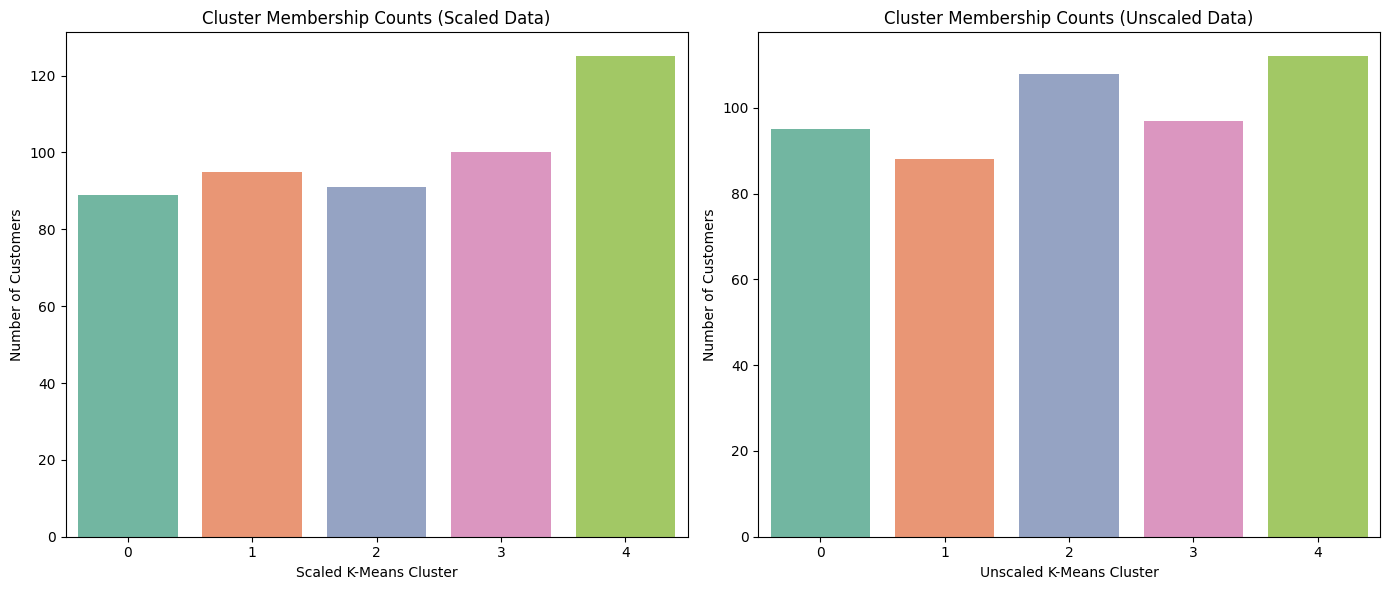

In [138]:
plt.figure(figsize=(14, 6))

# Scaled K-Means Clusters
plt.subplot(1, 2, 1)
sns.countplot(
    x='KMeans_Cluster_Scaled',
    hue='KMeans_Cluster_Scaled',
    data=df,
    palette='Set2',
    legend=False
)
plt.title('Cluster Membership Counts (Scaled Data)')
plt.xlabel('Scaled K-Means Cluster')
plt.ylabel('Number of Customers')

# Unscaled K-Means Clusters
plt.subplot(1, 2, 2)
sns.countplot(
    x='KMeans_Cluster',
    hue='KMeans_Cluster',
    data=df,
    palette='Set2',
    legend=False
)
plt.title('Cluster Membership Counts (Unscaled Data)')
plt.xlabel('Unscaled K-Means Cluster')
plt.ylabel('Number of Customers')

plt.tight_layout()
plt.show()

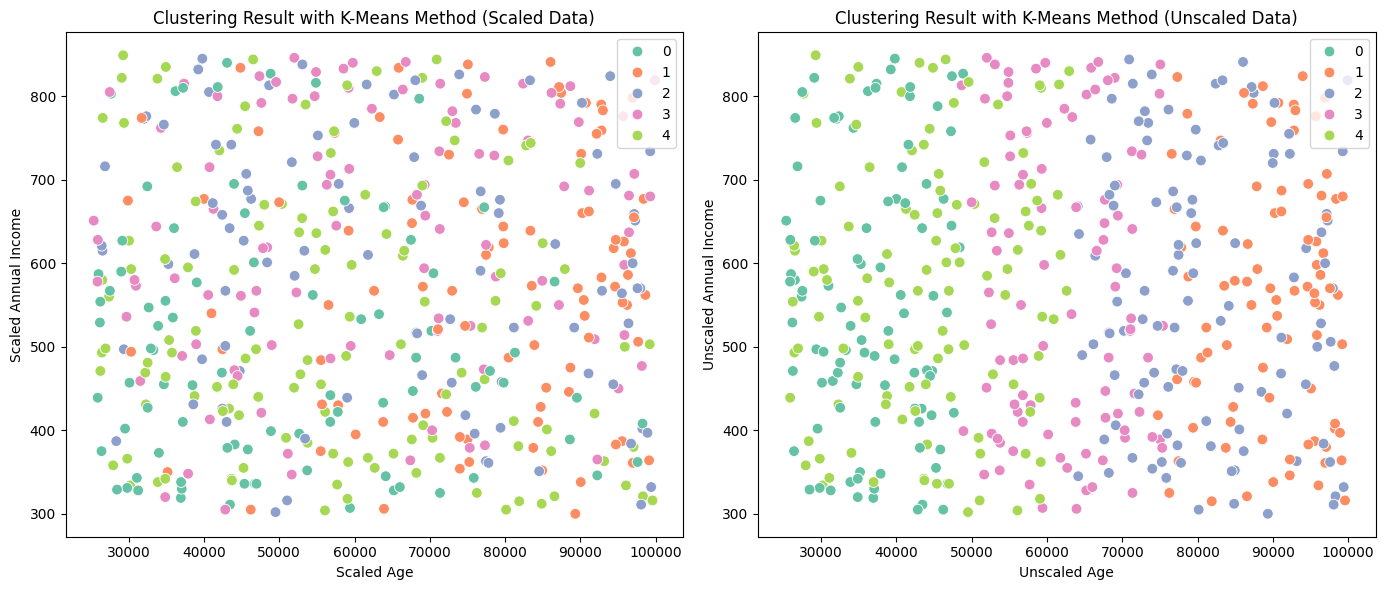

In [139]:
plt.figure(figsize=(14, 6))

# Counts of each unique value in the 'Scaled_K-Means_Cluster' column
plt.subplot(1, 2, 1)
sns.scatterplot(x = "Income", y = "Credit_Score", hue="KMeans_Cluster_Scaled", palette="Set2", data=df, s = 60)
plt.xlabel('Scaled Age')
plt.ylabel("Scaled Annual Income")
plt.title("Clustering Result with K-Means Method (Scaled Data)")
plt.legend()

# Counts of each unique value in the 'Unscaled_K-Means_Cluster' column
plt.subplot(1, 2, 2)
sns.scatterplot(x = "Income", y = "Credit_Score", hue="KMeans_Cluster", palette="Set2", data=df, s = 60)
plt.xlabel("Unscaled Age")
plt.ylabel("Unscaled Annual Income")
plt.title("Clustering Result with K-Means Method (Unscaled Data)")
plt.legend()

plt.tight_layout()
plt.show()

In [140]:
fig = px.scatter_3d(
    df,
    x='Age',
    y='Income',
    z='Credit_Score',
    color='Credit_Score',
    color_continuous_scale='viridis',
    title='3D Scatter: Age vs Income vs Credit Score',
    labels={
        'Age': 'Age',
        'Annual Income': 'Income',
        'Credit Score': 'Credit_Score'
    }
)

fig.update_traces(marker=dict(size=6, line=dict(width=0.5, color='DarkSlateGrey')))
fig.update_layout(scene=dict(
    xaxis=dict(gridcolor='lightgray', zeroline=False),
    yaxis=dict(gridcolor='lightgray', zeroline=False),
    zaxis=dict(gridcolor='lightgray', zeroline=False)
))

fig.show()

In [141]:
fig = px.scatter_3d(
    df,
    x='Age',
    y='Income',
    z='Credit_Score',
    color='KMeans_Cluster_Scaled',
    color_continuous_scale='viridis',
    title='3D Scatter: Age vs Income vs Credit Score',
    labels={
        'Age': 'Age',
        'Income': 'Income',
        'Credit_Score': 'Credit Score'
    }
)

fig.update_traces(marker=dict(size=6, line=dict(width=0.5, color='DarkSlateGrey')))
fig.update_layout(scene=dict(
    xaxis=dict(gridcolor='lightgray', zeroline=False),
    yaxis=dict(gridcolor='lightgray', zeroline=False),
    zaxis=dict(gridcolor='lightgray', zeroline=False)
))

fig.show()

In [145]:
# Data summary for 'Unscaled_ K-Means_Cluster'
cluster_summary = df.groupby('KMeans_Cluster').agg({
    'Income': ['mean', 'median'],
    'Age': ['mean', 'median'],
    'Education': [('mode', lambda x: x.mode()[0]), 'count'], # Use a lambda for mode
    'Credit_Score': ['mean', 'median'],
    'Years_with_Bank': ['mean', 'median'],
    'Transaction_Count': ['mean', 'median'],
    'Balance': ['mean', 'median'],
    'Loan_Approval_Amount': ['mean', 'median'],
    'Credit_Card_Limit': ['mean', 'median'],
    'Purchase_Frequency': ['mean', 'median'],
    'Customer_Satisfaction': [('mode', lambda x: x.mode()[0]), 'count'], # Use a lambda for mode
    'Online_Activity': ['mean', 'median']
})

# The lambda function creates a named column 'mode', so the rename is no longer needed
cluster_summary = cluster_summary.rename_axis('cluster')

cluster_summary

Income                      Age        Education        \
                 mean        median       mean median      mode count   
cluster                                                                 
0        36844.392819  37040.411690  39.147368   36.0         0    95   
1        89555.982874  90510.198330  41.329545   41.0         1    88   
2        81010.487835  79233.371355  38.574074   37.0         1   108   
3        62127.776495  62304.352410  40.206186   41.0         1    97   
4        44336.970875  44621.487965  40.919643   41.0         1   112   

        Credit_Score        Years_with_Bank         ... Loan_Approval_Amount  \
                mean median            mean median  ...                 mean   
cluster                                             ...                        
0         554.421053  540.0       11.652632   11.0  ...         35496.519082   
1         559.068182  565.5       10.738636   11.5  ...         34857.180437   
2         566.972222  561.0       10.388889   10.0  ...         12436.305202   
3         571.886598  539.0       10.546392   11.0  ...         37858.384727   
4         570.732143  578.5       10.767857   11.5  ...         11096.193986   

                      Credit_Card_Limit               Purchase_Frequency  \
               median              mean        median               mean   
cluster                                                                    
0        36110.333560      10090.619521  10749.672250           0.495563   
1        34919.177535      10422.315057  10284.852095           0.536538   
2        12520.698375      10113.855806   9781.979702           0.508219   
3        39313.866250      11218.701093  10795.436080           0.515737   
4        10909.777430      11149.135836  11665.209660           0.510433   

                  Customer_Satisfaction       Online_Activity            
           median                  mode count            mean    median  
cluster                                                                  
0        0.497455                     2    95        0.528798  0.511652  
1        0.572451                     4    88        0.449767  0.384759  
2        0.493521                     3   108        0.470665  0.442153  
3        0.531934                     4    97        0.508378  0.483271  
4        0.531787                     2   112        0.511594  0.539775  

[5 rows x 24 columns]

In [146]:
# Data summary for 'Scaled K-Means_Cluster'
cluster_summary = df.groupby('KMeans_Cluster_Scaled').agg({
    'Income': ['mean', 'median'],
    'Age': ['mean', 'median'],
    'Education': ['first', 'count'],
    'Credit_Score': ['mean', 'median'],
    'Years_with_Bank': ['mean', 'median'],
    'Transaction_Count': ['mean', 'median'],
    'Balance': ['mean', 'median'],
    'Loan_Approval_Amount': ['mean', 'median'],
    'Credit_Card_Limit': ['mean', 'median'],
    'Purchase_Frequency': ['mean', 'median'],
    'Customer_Satisfaction': ['first', 'count'],
    'Online_Activity': ['mean', 'median']
})

# Rename the <lambda> column in the Gender MultiIndex level
cluster_summary_scaled = cluster_summary.rename(columns={'first': 'mode'}, level=1)

cluster_summary_scaled = cluster_summary.rename_axis('cluster')

cluster_summary_scaled

Income                      Age        Education        \
                 mean        median       mean median     first count   
cluster                                                                 
0        50959.146611  46129.757930  43.460674   44.0         1    89   
1        76333.222074  79759.152210  46.494737   47.0         1    95   
2        64808.676606  65243.440830  40.736264   39.0         1    91   
3        62537.639876  59628.674055  31.970000   30.0         1   100   
4        57472.302805  56099.645500  38.528000   37.0         0   125   

        Credit_Score        Years_with_Bank         ... Loan_Approval_Amount  \
                mean median            mean median  ...                 mean   
cluster                                             ...                        
0         499.426966  469.0       10.988764   11.0  ...         27200.387559   
1         571.715789  570.0       14.600000   15.0  ...         31734.583722   
2         600.846154  615.0        8.153846    7.0  ...         22553.775802   
3         627.900000  639.0       11.280000   12.0  ...         30138.168415   
4         530.136000  497.0        9.344000    9.0  ...         17567.430496   

                      Credit_Card_Limit               Purchase_Frequency  \
               median              mean        median               mean   
cluster                                                                    
0        28724.650130       7309.849497   6145.963490           0.365414   
1        34034.147740       9190.250476   9290.981762           0.589782   
2        20164.145760      13903.004920  15066.280440           0.668025   
3        32442.910555      11394.077934  11778.735235           0.473144   
4        15177.754160      11014.036677  12155.973760           0.477765   

                  Customer_Satisfaction       Online_Activity            
           median                 first count            mean    median  
cluster                                                                  
0        0.318900                     3    89        0.529225  0.540570  
1        0.628095                     4    95        0.338549  0.248232  
2        0.711216                     2    91        0.526522  0.549358  
3        0.491480                     1   100        0.582486  0.600108  
4        0.519520                     1   125        0.494664  0.482243  

[5 rows x 24 columns]

# Result using Silhouette Score

In [147]:
from sklearn.metrics import silhouette_score

# Calculate Silhouette Score for Scaled K-Means Cluster
silhouette_scaled = silhouette_score(df_sc_scaled, df['KMeans_Cluster_Scaled'])
print(f"Silhouette Score for Scaled K-Means Cluster: {silhouette_scaled:.3f}")

# Calculate Silhouette Score for Unscaled K-Means Cluster
silhouette_unscaled = silhouette_score(df.drop(columns=['KMeans_Cluster_Scaled', 'KMeans_Cluster']), df['KMeans_Cluster'])
print(f"Silhouette Score for Unscaled K-Means Cluster: {silhouette_unscaled:.3f}")

Silhouette Score for Scaled K-Means Cluster: 0.064
Silhouette Score for Unscaled K-Means Cluster: 0.318


# Managerial Implications Based on the Five Clusters
Cluster 0 – Young / Lower-Income Group

Profile:

Income: ~$36K (lowest)

Age: ~39 (still relatively young)

Education: slightly lower

Credit Score: moderate (≈554)

Purchase Frequency: ~10.9 (average)

Customer Satisfaction: 0.53 (moderate)

Online Activity: medium (≈0.53)

Implications:

Likely to be budget-conscious consumers, possibly early professionals or mid-career individuals with financial constraints.

Marketing Focus: emphasize affordability and discounts.

Product Strategy: introduce lower-tier or installment-based options.

Engagement Channels: social media and online promotions (they are moderately active online).

Retention: use rewards programs or cashback incentives to improve loyalty.

Cluster 1 – High-Income Professionals

Profile:

Income: ~$89K (highest)

Age: ~41 (mid-career stability)

Credit Score: good (≈559)

Credit Card Limit: high (~$34K)

Customer Satisfaction: moderate (~0.45)

Online Activity: lower (≈0.45)

Implications:

Wealthy, established professionals who value quality, exclusivity, and convenience.

Marketing Focus: premium branding and personalized offers (VIP tiers, loyalty rewards).

Product Strategy: high-end or bundled products that emphasize time-saving and prestige.

Engagement: less digital activity — reach via targeted email or partnerships (e.g., professional services).

Retention: emphasize brand trust and premium support.

Cluster 2 – Upper-Mid Income, Younger Tech-Oriented

Profile:

Income: ~$81K (second-highest)

Age: ~38

Credit Score: ~567 (highest)

Customer Satisfaction: ~0.47

Online Activity: moderate (~0.47)

Purchase Frequency: ~10.4 (slightly below average)

Implications:

Likely financially stable but selective buyers.

Marketing Focus: highlight value-for-money — they can afford quality but remain practical.

Product Strategy: promote products balancing cost and performance.

Engagement Channels: strong digital campaigns — they’re familiar with online shopping.

Retention: family- or security-focused campaigns (trust and reliability themes).

Cluster 3 – Middle-Income, Balanced Consumers

Profile:

Income: ~$62K (middle)

Age: ~40

Credit Score: ~572 (highest among clusters)

Credit Card Limit: ~$37K (high)

Customer Satisfaction: ~0.51

Online Activity: ~0.51

Implications:

Likely financially stable professionals with balanced lifestyles.

Marketing Focus: loyalty, trust, and quality.

Product Strategy: mid-range or bundled deals that offer both quality and savings.

Engagement: effective through digital ads and loyalty programs.

Retention: upselling to premium tiers through trust and personalized service.

Cluster 4 – Lower-Mid Income, Moderate Age

Profile:

Income: ~$44K

Age: ~41

Credit Score: ~571

Credit Card Limit: ~$11K (low)

Customer Satisfaction: ~0.51

Online Activity: ~0.51

Implications:

Likely value-driven consumers with constrained budgets.

Marketing Focus: affordability, reliability, and installment options.

Product Strategy: practical bundles or budget-friendly versions.

Engagement: strong digital presence — responsive to promotions or referral programs.

Retention: offer loyalty points and small rewards for repeat purchases.